# Using streamz, a control flow handler for pipelines

In [1]:
from streamz.dataframe import Random, StreamingDataFrame

# creating a random signal with 20 samples per window at defined interval

In [2]:
source = Random(freq='5ms', interval='100ms')
sdf = (source-0.5).cumsum()
# sdf.tail()

In [3]:
p = StreamingDataFrame({'raw':sdf.x, 'smooth': sdf.x.rolling('100ms').mean(), 'very-smooth':sdf.x.rolling('500ms').mean()}).plot(width=700)

Loading BokehJS ...

In [4]:

import requests
import json
import pandas as pd

In [5]:
r1 = requests.get('https://api.coindesk.com/v1/bpi/currentprice.json')

In [6]:
r2 = requests.get('https://api.coindesk.com/v1/bpi/historical/close.json')

In [9]:
json.loads(r1.content)['bpi']

{u'EUR': {u'code': u'EUR',
  u'description': u'Euro',
  u'rate': u'11,653.5103',
  u'rate_float': 11653.5103,
  u'symbol': u'&euro;'},
 u'GBP': {u'code': u'GBP',
  u'description': u'British Pound Sterling',
  u'rate': u'10,335.8308',
  u'rate_float': 10335.8308,
  u'symbol': u'&pound;'},
 u'USD': {u'code': u'USD',
  u'description': u'United States Dollar',
  u'rate': u'13,982.0200',
  u'rate_float': 13982.02,
  u'symbol': u'&#36;'}}

In [10]:
json.loads(r2.content)['bpi']

{u'2017-12-10': 15036.9563,
 u'2017-12-11': 16699.6775,
 u'2017-12-12': 17178.1025,
 u'2017-12-13': 16407.2025,
 u'2017-12-14': 16531.0838,
 u'2017-12-15': 17601.9438,
 u'2017-12-16': 19343.04,
 u'2017-12-17': 19086.6438,
 u'2017-12-18': 18960.5225,
 u'2017-12-19': 17608.35,
 u'2017-12-20': 16454.7225,
 u'2017-12-21': 15561.05,
 u'2017-12-22': 13857.145,
 u'2017-12-23': 14548.71,
 u'2017-12-24': 13975.4363,
 u'2017-12-25': 13917.0275,
 u'2017-12-26': 15745.2575,
 u'2017-12-27': 15378.285,
 u'2017-12-28': 14428.76,
 u'2017-12-29': 14427.87,
 u'2017-12-30': 12629.8138,
 u'2017-12-31': 13860.1363,
 u'2018-01-01': 13412.44,
 u'2018-01-02': 14740.7563,
 u'2018-01-03': 15134.6513,
 u'2018-01-04': 15155.2263,
 u'2018-01-05': 16937.1738,
 u'2018-01-06': 17135.8363,
 u'2018-01-07': 16178.495,
 u'2018-01-08': 14970.3575,
 u'2018-01-09': 14439.4738}

## Listing of all indices under local, ticker, crypto and global

In [13]:
r3 = requests.get('https://apiv2.bitcoinaverage.com/symbols/indices/ticker')

In [14]:
json.loads(r3.content)

{u'crypto': {u'symbols': [u'ADABTC',
   u'ADAETH',
   u'BCCBTC',
   u'BCCETH',
   u'BCCUSDT',
   u'BCHBTC',
   u'BCHETH',
   u'BCHUSDT',
   u'BCNBTC',
   u'BCNXMR',
   u'BTCDBTC',
   u'BTCUSDT',
   u'BTGBTC',
   u'BTGETH',
   u'BTGUSDT',
   u'BTSBTC',
   u'BTSETH',
   u'DASHBTC',
   u'DASHETH',
   u'DASHUSDT',
   u'DASHXMR',
   u'DOGEBTC',
   u'ETCBTC',
   u'ETCETH',
   u'ETCUSDT',
   u'ETHBTC',
   u'ETHUSDT',
   u'HSRBTC',
   u'HSRETH',
   u'IOTABTC',
   u'IOTAETH',
   u'KMDBTC',
   u'KMDETH',
   u'LSKBTC',
   u'LSKETH',
   u'LTCBTC',
   u'LTCETH',
   u'LTCUSDT',
   u'LTCXMR',
   u'MONABTC',
   u'NEOBTC',
   u'NEOETH',
   u'NEOUSDT',
   u'NXTBTC',
   u'NXTUSDT',
   u'NXTXMR',
   u'QTUMBTC',
   u'QTUMETH',
   u'SCBTC',
   u'SCETH',
   u'STEEMBTC',
   u'STEEMETH',
   u'STRATBTC',
   u'STRATETH',
   u'WAVESBTC',
   u'WAVESETH',
   u'XEMBTC',
   u'XEMETH',
   u'XLMBTC',
   u'XLMETH',
   u'XMRBTC',
   u'XMRETH',
   u'XMRUSDT',
   u'XRPBTC',
   u'XRPETH',
   u'XRPUSDT',
   u'XVCBTC',
   u'Z

# Acquire history from bitcoinaverage API

In [23]:
r4 = requests.get('https://apiv2.bitcoinaverage.com/indices/global/history/ETHUSD?period=alltime&?format=json')

In [24]:
j3 = json.loads(r4.content); len(j3)

643

In [25]:
pricing_times = []
pricing_values = []
for item in j3:
    pricing_times.append(item['time'])
    pricing_values.append(item['average'])

In [26]:
pricing_window = {'time': pricing_times, 'values': pricing_values}
df = pd.DataFrame(pricing_window)

In [27]:
print(df)

                    time     values
0    2018-01-09 00:00:00  1204.3317
1    2018-01-08 00:00:00  1139.4634
2    2018-01-07 00:00:00  1065.5314
3    2018-01-06 00:00:00   991.2783
4    2018-01-05 00:00:00   976.4309
5    2018-01-04 00:00:00   947.5573
6    2018-01-03 00:00:00   884.0732
7    2018-01-02 00:00:00   847.0281
8    2018-01-01 00:00:00   746.0305
9    2017-12-31 00:00:00   718.5985
10   2017-12-30 00:00:00   709.4118
11   2017-12-29 00:00:00   735.4178
12   2017-12-28 00:00:00   704.5810
13   2017-12-27 00:00:00   746.1073
14   2017-12-26 00:00:00   743.8996
15   2017-12-25 00:00:00   721.8986
16   2017-12-24 00:00:00   661.7207
17   2017-12-23 00:00:00   715.9706
18   2017-12-22 00:00:00   666.7363
19   2017-12-21 00:00:00   805.3103
20   2017-12-20 00:00:00   792.6757
21   2017-12-19 00:00:00   820.4251
22   2017-12-18 00:00:00   730.7404
23   2017-12-17 00:00:00   715.4045
24   2017-12-16 00:00:00   692.5363
25   2017-12-15 00:00:00   668.1477
26   2017-12-14 00:00:00   7

In [28]:
df['time'] = pd.to_datetime(df['time'])
df.index = df['time']
del df['time']
df

,values
time,
2018-01-09,1204.3317
2018-01-08,1139.4634
2018-01-07,1065.5314
2018-01-06,991.2783
2018-01-05,976.4309
2018-01-04,947.5573
2018-01-03,884.0732
2018-01-02,847.0281
2018-01-01,746.0305


In [29]:
import seaborn as sns

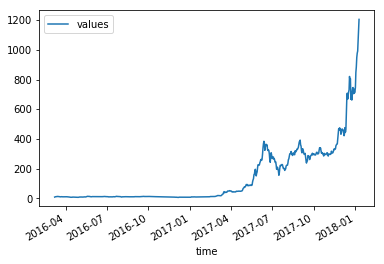

In [30]:
df.plot()

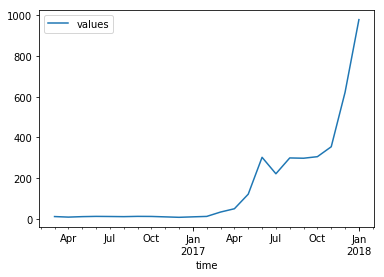

In [32]:
df.resample('M').mean().plot()